**<h1>Multi-Label Classification</h1>**

**<h3>Packages</h3>**

In [1]:
import os
import cv2
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import pandas as pd
import seaborn as sn

In [3]:
from tensorflow.python.keras.applications.resnet50 import ResNet50
from tensorflow.python.keras.applications.vgg16 import VGG16
from tensorflow.python.keras.preprocessing import image
from tensorflow.python.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

**<h3>Loading Images</h3>**

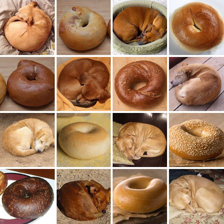

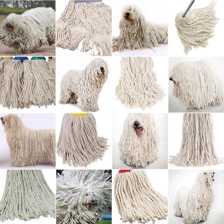

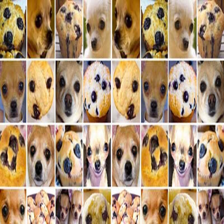

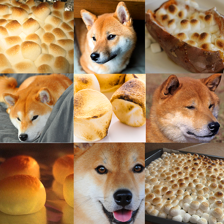

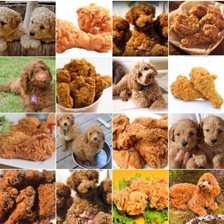

In [52]:
images = {}
all_image_paths = []
for x in os.listdir("images"):
    images[x] = Image.open("images/" + x)
    all_image_paths.append("images/" + x)
    newsize = (224,224)
    display(images[x].resize(newsize))

**<h3>Loading Pretrained Weights</h3>**

In [6]:
modelRN50 = ResNet50(weights='imagenet')
modelV16 = VGG16(weights='imagenet')

**<h3>Making Predictions</h3>**

In [31]:
def predict(model, path, target_size):
    predictions = []
    for i in range(len(path)):
        # Loading Image
        img = image.load_img(path[i], target_size=target_size)
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        
        prediction = model.predict(x)
        print('Predicted:', decode_predictions(prediction, top=3)[0])
        predictions.append(prediction)
    
    return predictions

In [32]:
resultRN50 = predict(modelRN50, all_image_paths, (224, 224))

Predicted: [('n07860988', 'dough', 0.89378107), ('n07875152', 'potpie', 0.048041247), ('n07734744', 'mushroom', 0.038147476)]
Predicted: [('n04599235', 'wool', 0.49225077), ('n02105505', 'komondor', 0.22790736), ('n04325704', 'stole', 0.037023596)]
Predicted: [('n02110341', 'dalmatian', 0.99327457), ('n02730930', 'apron', 0.0018913005), ('n02089973', 'English_foxhound', 0.001875489)]
Predicted: [('n02115641', 'dingo', 0.82183397), ('n02112137', 'chow', 0.0815802), ('n02115913', 'dhole', 0.06238832)]
Predicted: [('n02113712', 'miniature_poodle', 0.4762092), ('n04399382', 'teddy', 0.3576994), ('n02101556', 'clumber', 0.048041467)]


In [13]:
def printResults(result):
    images = {}
    i = 0
    for x in os.listdir("images"):
        print(x)
        images[x] = Image.open("images/" + x)
        newsize = (224,224)
        display(images[x].resize(newsize))
        pred = decode_predictions(result[i], top=5)[0]
        print("Image " +str(x)+ "'s predicted top five:")
        for j in range(len(pred)):
            print(str(j+1) + ")", pred[j][1], pred[j][2])
        print(" ")
        i+=1

dog-food-comparison-bagel-muffin-lookalike-teenybiscuit-karen-zack__700.jpg


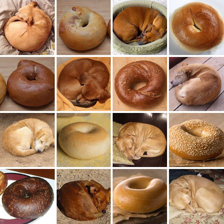

40960/35363 [==================================]40960/35363 [==================================] - 0s 3us/step

Image dog-food-comparison-bagel-muffin-lookalike-teenybiscuit-karen-zack__700.jpg's predicted top five:
1) dough 0.89378107
2) potpie 0.048041247
3) mushroom 0.038147476
4) bolete 0.016904771
5) earthstar 0.0015882038
 
dog_or_mop.png


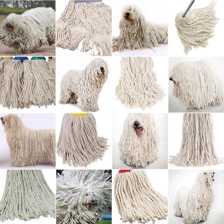

Image dog_or_mop.png's predicted top five:
1) wool 0.49225077
2) komondor 0.22790736
3) stole 0.037023596
4) hay 0.02535542
5) cardigan 0.022000471
 
image-recognition-fails.jpeg


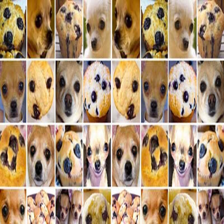

Image image-recognition-fails.jpeg's predicted top five:
1) dalmatian 0.99327457
2) apron 0.0018913005
3) English_foxhound 0.001875489
4) Weimaraner 0.00053461373
5) sombrero 0.00031188832
 
image_processing20190621-19-1965q7w.png


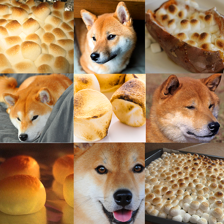

Image image_processing20190621-19-1965q7w.png's predicted top five:
1) dingo 0.82183397
2) chow 0.0815802
3) dhole 0.06238832
4) basenji 0.018142847
5) red_wolf 0.0044001224
 
labradoodle-or-fried-chicken_custom-2cd16027dfac04e257bf86a24ce9173c619e85a7.jpg


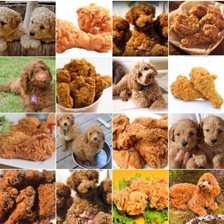

Image labradoodle-or-fried-chicken_custom-2cd16027dfac04e257bf86a24ce9173c619e85a7.jpg's predicted top five:
1) miniature_poodle 0.4762092
2) teddy 0.3576994
3) clumber 0.048041467
4) curly-coated_retriever 0.023889884
5) standard_poodle 0.023333983
 


In [14]:
printResults(resultRN50)